In [12]:
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
files = [
    '../examples/simplified_runs/LiGen_2023-08-05_1226.json',
    '../examples/simplified_runs/Query26_2023-08-05_1125.json',
]

In [23]:
dfs = []
for filename in files:
    df = pd.read_json(filename, orient='records')
    df = df.set_index('iteration')
    if 'simplified_runs' in filename:
        df['algorithm'] = 'q-KG'
    else:
        df['algorithm'] = 'MALIBOO'
    dfs.append(df)

In [24]:
df.describe()

,n_initial_points,q,computed_cost,n_evaluations,error
count,4.0,4.0,4.000000e+00,4.000000,4.000000
mean,3.0,3.0,1.227174e+06,10.500000,516764.825000
std,0.0,0.0,3.515537e+05,3.872983,351553.725373
min,3.0,3.0,7.104096e+05,6.000000,0.000000
25%,3.0,3.0,1.152906e+06,8.250000,442496.175000
50%,3.0,3.0,1.374673e+06,10.500000,664263.550000
75%,3.0,3.0,1.448942e+06,12.750000,738532.200000
max,3.0,3.0,1.448942e+06,15.000000,738532.200000


In [25]:
df.head()

,n_initial_points,q,target,suggested_minimum,closest_point_in_domain,computed_cost,n_evaluations,error,algorithm
iteration,,,,,,,,,
0,3,3,Query26,"[5.613959383428281, 4.408443545370475]","[6.0, 4.0]",1448941.8,6,738532.2,q-KG
1,3,3,Query26,"[5.541219770792049, 3.4424481282028863]","[6.0, 4.0]",1448941.8,9,738532.2,q-KG
2,3,3,Query26,"[5.390520675186204, 3.707816458153091]","[5.0, 4.0]",1300404.5,12,589994.9,q-KG
3,3,3,Query26,"[3.3350235386067, 8.528272693107002]","[3.0, 9.0]",710409.6,15,0.0,q-KG


Text(0.5, 1.0, 'Error Comparison')

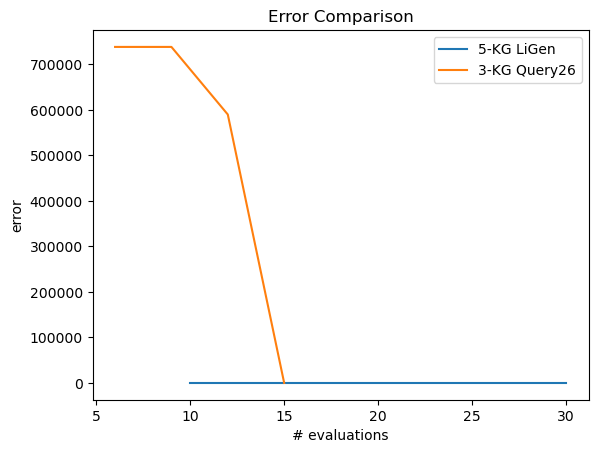

In [42]:
for df in dfs:
    algo = df['algorithm'].unique()[0]
    target_dataset = df['target'].unique()[0]
    q = df['q'].unique()[0]
    plt.plot(df['n_evaluations'], df['error'], label=f'{algo.replace("q", str(q))} {target_dataset}')
plt.legend()
plt.xlabel('# evaluations')
plt.ylabel('error')
plt.title('Error Comparison')

In [ ]:
for algorithm in ['q-KG', 'MALIBOO']:
    